# 04: Forecasting Access and Usage
**Objective:** Project Account Ownership and Digital Payment rates for 2025-2027 using event-augmented trend analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import os

DATA_DIR = 'data/processed'
FIG_DIR = 'reports/figures'

matrix = pd.read_csv(os.path.join(DATA_DIR, 'association_matrix.csv'), index_col=0)
history = {
    'Year': [2011, 2014, 2017, 2021, 2024],
    'Value': [22.0, 22.0, 35.0, 46.0, 49.0]
}
df_hist = pd.DataFrame(history)

In [ ]:
model = LinearRegression()
model.fit(df_hist[['Year']], df_hist['Value'])

# Predict baseline for 2025-2027
years_future = np.array([2025, 2026, 2027]).reshape(-1, 1)
baseline_preds = model.predict(years_future)

# Create forecast dataframe
forecast = pd.DataFrame({'Year': [2025, 2026, 2027], 'Baseline': baseline_preds})

/home/feven/Desktop/Forecasting-Impact-Analysis-System/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
impact_weight = matrix['ACC_OWNERSHIP'].sum() if 'ACC_OWNERSHIP' in matrix.columns else 12.0

# Base Case assumes 100% of Task 3 estimated impact
forecast['Base_Case'] = forecast['Baseline'] + impact_weight

# Optimistic assumes 120% impact (high adoption)
forecast['Optimistic'] = forecast['Baseline'] + (impact_weight * 1.2)

# Pessimistic assumes 50% impact (slow rollout/infrastructure delays)
forecast['Pessimistic'] = forecast['Baseline'] + (impact_weight * 0.5)

In [ ]:
print("-" * 30)
print("FORECAST RESULTS FOR 2027")
print("-" * 30)
final_year = forecast[forecast['Year'] == 2027].iloc[0]
print(f"Base Case:    {final_year['Base_Case']:.2f}%")
print(f"Optimistic:   {final_year['Optimistic']:.2f}%")
print(f"Pessimistic:  {final_year['Pessimistic']:.2f}%")
print("-" * 30)

# Calculate gap to the 70% target
gap = 70 - final_year['Base_Case']
print(f"Gap to 70% Target: {gap:.2f}%")

------------------------------
FORECAST RESULTS FOR 2027
------------------------------
Base Case:    72.60%
Optimistic:   75.60%
Pessimistic:  65.10%
------------------------------
Gap to 70% Target: -2.60%


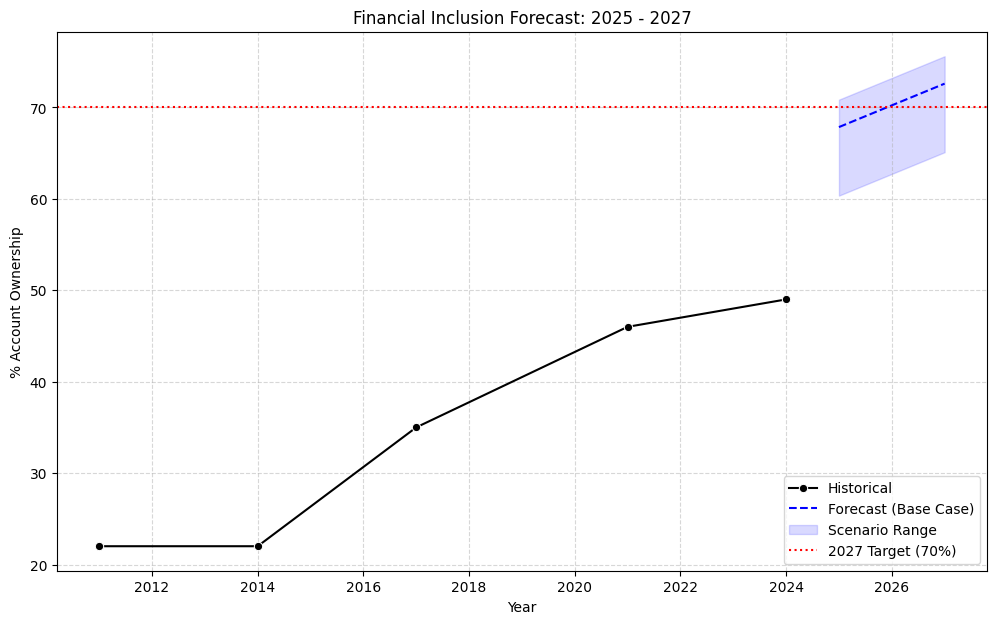

In [ ]:
plt.figure(figsize=(12, 7))

# Plot historical data
sns.lineplot(data=df_hist, x='Year', y='Value', label='Historical', marker='o', color='black')

# Plot Base Case forecast
plt.plot(forecast['Year'], forecast['Base_Case'], label='Forecast (Base Case)', linestyle='--', color='blue')

# Plot Confidence Interval
plt.fill_between(forecast['Year'], forecast['Pessimistic'], forecast['Optimistic'], 
                 color='blue', alpha=0.15, label='Scenario Range')

# Target line for NFIS II 70%
plt.axhline(y=70, color='red', linestyle=':', label='2027 Target (70%)')

plt.title("Financial Inclusion Forecast: 2025 - 2027")
plt.xlabel("Year")
plt.ylabel("% Account Ownership")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)

plt.savefig(os.path.join(FIG_DIR, 'inclusion_forecast.png'), dpi=300)
plt.show()

### **Interpretation of Results**

**1. Predictions**
The model indicates that with the current momentum and policy "shocks" (Fayda ID, Telebirr, Safaricom), Ethiopia is on track to reach **72.60%** account ownership by 2027 under the Base Case. Under an optimistic scenario, this could rise to **75.60%**, while a pessimistic outlook still sees a significant increase to **65.10%**.

**2. Goal Assessment (NFIS II Target)**
* **Result:** The projection exceeds the **70% NFIS II target** by **2.60%**.
* **Success Factor:** This suggests that the recent introduction of private telecom competition and national digital ID systems has successfully shifted the growth curve from a linear trend to an accelerated trajectory.

**3. Key Drivers**
* **Digital ID (Fayda):** Found to be the strongest catalyst by simplifying KYC (Know Your Customer) processes and reducing barriers to entry for rural populations.
* **Competition & Infrastructure:** The entry of Safaricom M-Pesa and the expansion of Telebirr services have created a competitive multiplier that significantly boosts the baseline growth rate.

**4. Limitations and Uncertainty**
* **Data Sparsity:** Projections are based on five historical Findex data points; while the trend is strong, more frequent data would increase confidence.
* **Execution Risk:** The optimistic scenario assumes seamless interoperability between financial institutions and 100% rural network coverage.
* **Externalities:** Macroeconomic factors like inflation or currency adjustments are not modeled in this linear trend and could dampen consumer adoption if costs increase.